Convergence achieved
[-3.0, -2.341690468634296, -2.142910554218328, -2.1344041094454274, -2.134403196706748]


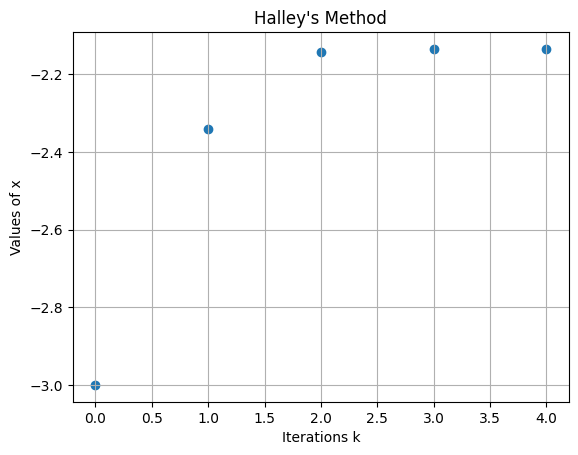

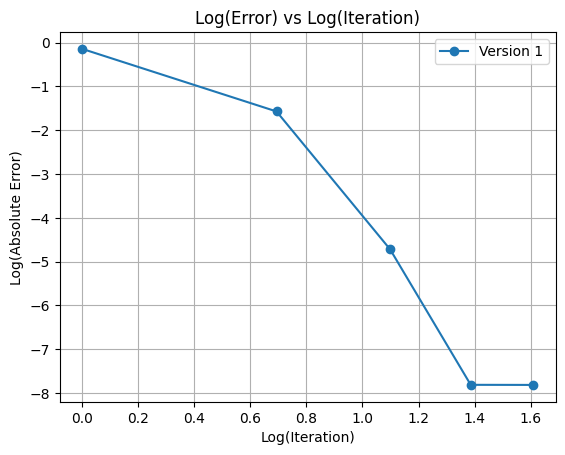

In [27]:
import sympy as sp
import numpy as np
import math
import matplotlib.pyplot as plt

def HalleyMethod(f, f_dot, f_double_dot, x0):
    x_values = np.zeros(20)
    error_vector = []
    x_values = [x0]
    i = 0
    while(1):
        if 2 * f_dot.subs(x, x_values[i])**2 - f_double_dot.subs(x, x_values[i]) * f.subs(x, x_values[i]) != 0:
        
            x_values.append(x_values[i] - (2 * f.subs(x, x_values[i]) * f_dot.subs(x, x_values[i]))/(2 * f_dot.subs(x, x_values[i])**2 - f_double_dot.subs(x, x_values[i]) * f.subs(x, x_values[i])))
            # Check Convergence
            e = 0.0001
            error_vector.append(abs(x_values[i + 1] - x_values[i]))
            if (abs(x_values[i + 1] - x_values[i]) <= e):
                print("Convergence achieved")
                result_float = [float(var) for var in x_values]
                print(result_float)
                break
        
            if (i > 21):
                print("Failed to converge, choose new initial value and try again.")
                break

            i = i + 1
        else:
            print("Failed to converge, choose new initial value and try again.")

    return x_values, error_vector



# Define the Variable and the Function
x = sp.Symbol('x')
#f = x**2 + 19 * x - 8
#f = x - 1
f = x**5 - 4 * x**3 - 3 * x - 1

# Calculate Derivative
f_dot = sp.diff(f, x)

# Calculate Second Derivative
f_double_dot = sp.diff(f_dot, x)

# Initial Value
x0 = -3

# Call Halley's Method
xarray, errors_list = HalleyMethod(f, f_dot, f_double_dot, x0)

# Define Solution
solution = -2.134

# Calculate Error
error = np.abs(np.array(xarray) - solution)

# Calculate the iterations
iterations = np.arange(1, len(xarray) + 1)

# Convert iterations to float
iterations_float = np.array(iterations, dtype=float)

# Convert error to float
error_float = np.array(error, dtype=float)


iterations_ = range(len(xarray))

plt.scatter(iterations_, xarray, label='x')
plt.xlabel('Iterations k')
plt.ylabel('Values of x')
plt.title('Halley\'s Method')
plt.grid(True)
plt.show()

# Logarithmic Plots
plt.plot(np.log(iterations_float), np.log(error_float), marker='o', linestyle='-', label='Version 1')
plt.title('Log(Error) vs Log(Iteration)')
plt.xlabel('Log(Iteration)')
plt.ylabel('Log(Absolute Error)')
plt.grid(True)
plt.legend()
plt.show()


